In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_entire, Y_train_entire),(X_test, Y_test)=fashion_mnist.load_data()

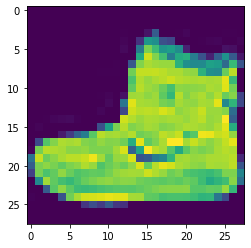

In [4]:
plt.imshow(X_train_entire[0])

In [5]:
Y_train_entire[0]

9

In [6]:
X_train_entire=X_train_entire/255.
X_test=X_test/255.

In [7]:
X_valid, X_train=X_train_entire[:5000],X_train_entire[5000:]
Y_valid, Y_train=Y_train_entire[:5000],Y_train_entire[5000:]

In [8]:
X_valid.shape


(5000, 28, 28)

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


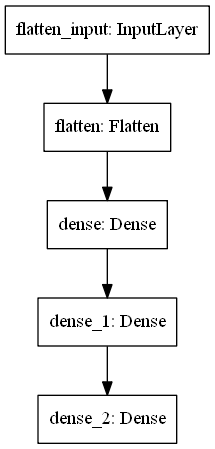

In [13]:
import pydot
keras.utils.plot_model(model)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [26]:
model_history=model.fit(X_train, Y_train, epochs=2, validation_data=(X_valid, Y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 120us/sample - loss: 0.1634 - accuracy: 0.9435 - val_loss: 0.2977 - val_accuracy: 0.8920
Epoch 2/2
55000/55000 [==============================] - 7s 122us/sample - loss: 0.1594 - accuracy: 0.9438 - val_loss: 0.3107 - val_accuracy: 0.8936


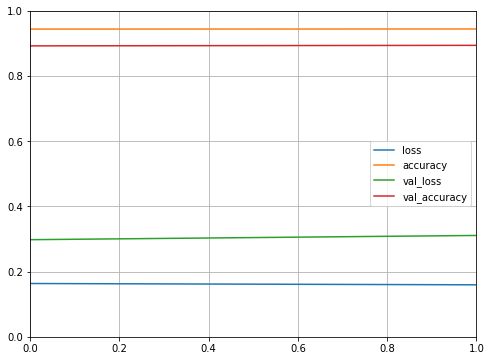

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.3514 - accuracy: 0.8831


[0.35140615264773367, 0.8831]

In [29]:
model.save("FashionMNIST.h5")

In [30]:
%pwd

'C:\\Users\\KIIT\\Notebooks'